In [301]:
# Set up packages
!pip install category_encoders
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from itertools import chain, combinations

pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn')

<ipython-input-301-2396966af1ed>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [1972]:
data = pd.read_csv('/content/Housing_Data_Train.csv') # Read the training data set.

# Data Pre-Processing





## `NaN`s

In [1973]:
# Check the NaN values
for column in data:
    if data[column].isna().any():
        print(f"Column '{column}' contains NaN values")

Column 'LotFrontage' contains NaN values
Column 'Alley' contains NaN values
Column 'MasVnrType' contains NaN values
Column 'MasVnrArea' contains NaN values
Column 'BsmtQual' contains NaN values
Column 'BsmtCond' contains NaN values
Column 'BsmtExposure' contains NaN values
Column 'BsmtFinType1' contains NaN values
Column 'BsmtFinType2' contains NaN values
Column 'FireplaceQu' contains NaN values
Column 'GarageType' contains NaN values
Column 'GarageYrBlt' contains NaN values
Column 'GarageFinish' contains NaN values
Column 'GarageQual' contains NaN values
Column 'GarageCond' contains NaN values
Column 'PoolQC' contains NaN values
Column 'Fence' contains NaN values
Column 'MiscFeature' contains NaN values


In [1974]:
# Transform Nan Values based on column attribute
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['Alley'] = data['Alley'].fillna("NA")
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['BsmtQual'] = data['BsmtQual'].fillna("NA")
data['BsmtCond'] = data['BsmtCond'].fillna("NA")
data['BsmtExposure'] = data['BsmtExposure'].fillna("NA")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("NA")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("NA")
data['Electrical'] = data['Electrical'].fillna("Mix")
data['FireplaceQu'] = data['FireplaceQu'].fillna("NA")
data['GarageType'] = data['GarageType'].fillna("NA")
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
data['GarageFinish'] = data['GarageFinish'].fillna("NA")
data['GarageQual'] = data['GarageQual'].fillna("NA")
data['GarageCond'] = data['GarageCond'].fillna("NA")
data['PoolQC'] = data['PoolQC'].fillna("NA")
data['Fence'] = data['Fence'].fillna("NA")
data['MiscFeature'] = data['MiscFeature'].fillna("NA")

In [1975]:
transformed_data = data # Create a copy of the data set.

The data shows that the scale of different columns vary a lot. Some of them are categorical.

Data trasformation is needed to include the most information to the model.

## Data-Transformation

Use Binary-Encoding and Label-Encoding to transform categorical variables.

In [1976]:
# MSSubClass - Binary Encoding
MSSubClass = transformed_data["MSSubClass"]

encoder = ce.BinaryEncoder(cols=['MSSubClass'])
encoded_MSSubClass = encoder.fit_transform(MSSubClass)
transformed_data["MSSubClass_0"] = encoded_MSSubClass['MSSubClass_0']
transformed_data["MSSubClass_1"] = encoded_MSSubClass['MSSubClass_1']
transformed_data["MSSubClass_2"] = encoded_MSSubClass['MSSubClass_2']
transformed_data["MSSubClass_3"] = encoded_MSSubClass['MSSubClass_3']

transformed_data = transformed_data.drop(['MSSubClass'], axis=1)

In [1977]:
# MSZoing - Binary Encoding
MSZoning = transformed_data["MSZoning"]

encoder = ce.BinaryEncoder(cols=['MSZoning'])
encoded_MSZoning = encoder.fit_transform(MSZoning)
transformed_data["MSZoning_0"] = encoded_MSZoning['MSZoning_0']
transformed_data["MSZoning_1"] = encoded_MSZoning['MSZoning_1']
transformed_data["MSZoning_2"] = encoded_MSZoning['MSZoning_2']
transformed_data = transformed_data.drop(['MSZoning'], axis=1)

In [1978]:
# Street - Binary Encoding
Street = transformed_data["Street"]

transformed_data['encoded_Street'] = transformed_data['Street'].map({
    "Grvl": 0,
    "Pave": 1
    })
transformed_data = transformed_data.drop(['Street'], axis=1)

In [1979]:
# Alley - Binary Encoding
Alley = data["Alley"]

encoder = ce.BinaryEncoder(cols=['Alley'])
encoded_Alley = encoder.fit_transform(Alley)
transformed_data["Alley_0"] = encoded_Alley['Alley_0']
transformed_data["Alley_1"] = encoded_Alley['Alley_1']

transformed_data = transformed_data.drop(['Alley'], axis=1)

In [1980]:
# LotShape - Label Encoding
LotShape = transformed_data["LotShape"]

transformed_data['encoded_LotShape'] = transformed_data['LotShape'].map({
    "Reg": 0,
    "IR1": 1,
    "IR2": 2,
    "IR3": 3
})

transformed_data = transformed_data.drop(['LotShape'], axis=1)

In [1981]:
# LandContour - Label Encoding
LandContour = transformed_data["LandContour"]

transformed_data['encoded_LandContour'] = transformed_data['LandContour'].map({
    "Low": 1,
    "HLS": 2,
    "Bnk": 3,
    "Lvl": 4})

transformed_data = transformed_data.drop(['LandContour'], axis=1)

In [1982]:
# Utilities - Label Encoding
Utilities = transformed_data["Utilities"]

transformed_data['encoded_Utilities'] = transformed_data['Utilities'].map({
    "ELO": 0,
    "NoSeWa": 1,
    "NoSewr": 2,
    "AllPub": 3})

transformed_data = transformed_data.drop(['Utilities'], axis=1)

In [1983]:
# LotConfig - Binary Encoding
LotConfig = transformed_data["LotConfig"]

encoder = ce.BinaryEncoder(cols=['LotConfig'])
encoded_LotConfig = encoder.fit_transform(LotConfig)
transformed_data["LotConfig_0"] = encoded_LotConfig['LotConfig_0']
transformed_data["LotConfig_1"] = encoded_LotConfig['LotConfig_1']
transformed_data["LotConfig_2"] = encoded_LotConfig['LotConfig_2']

transformed_data = transformed_data.drop(['LotConfig'], axis=1)

In [1984]:
# LandSlope - Label Encoding
LandSlope = transformed_data["LandSlope"]

transformed_data['encoded_LandSlope'] = transformed_data['LandSlope'].map({
    "Gtl": 2,
    "Mod": 1,
    "Sev": 0})

transformed_data = transformed_data.drop(['LandSlope'], axis=1)

In [1985]:
# Neighborhood - Binary Encoding
Neighborhood = transformed_data["Neighborhood"]

encoder = ce.BinaryEncoder(cols=['Neighborhood'])
encoded_Neighborhood = encoder.fit_transform(Neighborhood)

transformed_data["Neighborhood_0"] = encoded_Neighborhood['Neighborhood_0']
transformed_data["Neighborhood_1"] = encoded_Neighborhood['Neighborhood_1']
transformed_data["Neighborhood_2"] = encoded_Neighborhood['Neighborhood_2']
transformed_data["Neighborhood_3"] = encoded_Neighborhood['Neighborhood_3']
transformed_data["Neighborhood_4"] = encoded_Neighborhood['Neighborhood_4']

transformed_data = transformed_data.drop(['Neighborhood'], axis=1)

In [1986]:
# Condition1 - Binary Encoding
Condition1 = transformed_data["Condition1"]

encoder = ce.BinaryEncoder(cols=['Condition1'])
encoded_Condition1 = encoder.fit_transform(Condition1)
transformed_data["Condition1_0"] = encoded_Condition1['Condition1_0']
transformed_data["Condition1_1"] = encoded_Condition1['Condition1_1']
transformed_data["Condition1_2"] = encoded_Condition1['Condition1_2']
transformed_data["Condition1_3"] = encoded_Condition1['Condition1_3']

transformed_data = transformed_data.drop(['Condition1'], axis=1)

In [1987]:
# Condition2 - Binary Encoding
Condition2 = transformed_data["Condition2"]

encoder = ce.BinaryEncoder(cols=['Condition2'])
encoded_Condition2 = encoder.fit_transform(Condition2)
transformed_data["Condition2_0"] = encoded_Condition2['Condition2_0']
transformed_data["Condition2_1"] = encoded_Condition2['Condition2_1']
transformed_data["Condition2_2"] = encoded_Condition2['Condition2_2']

transformed_data = transformed_data.drop(['Condition2'], axis=1)

In [1988]:
# BldgType - Binary Encoding
BldgType = transformed_data["BldgType"]

encoder = ce.BinaryEncoder(cols=['BldgType'])
encoded_BldgType = encoder.fit_transform(BldgType)
transformed_data["BldgType_0"] = encoded_BldgType['BldgType_0']
transformed_data["BldgType_1"] = encoded_BldgType['BldgType_1']
transformed_data["BldgType_2"] = encoded_BldgType['BldgType_2']

transformed_data = transformed_data.drop(['BldgType'], axis=1)

In [1989]:
# HouseStyle - Label Encoding
HouseStyle = transformed_data["HouseStyle"]

transformed_data['encoded_HouseStyle'] = transformed_data['HouseStyle'].map({
    "1Story": 1,
    "1.5Fin": 1.75,
    "1.5Unf": 1.5,
    "2Story": 2,
    "2.5Fin": 2.75,
    "2.5Unf": 2.5,
    "SFoyer": 3,
    "SLvl"  : 3.25
    })

transformed_data = transformed_data.drop(['HouseStyle'], axis=1)


In [1990]:
# RoofStyle - Binary Encoding
RoofStyle = transformed_data["RoofStyle"]

encoder = ce.BinaryEncoder(cols=['RoofStyle'])
encoded_RoofStyle = encoder.fit_transform(RoofStyle)
transformed_data["RoofStyle_0"] = encoded_RoofStyle['RoofStyle_0']
transformed_data["RoofStyle_1"] = encoded_RoofStyle['RoofStyle_1']
transformed_data["RoofStyle_2"] = encoded_RoofStyle['RoofStyle_2']

transformed_data = transformed_data.drop(['RoofStyle'], axis=1)

In [1991]:
# Roof Material - Binary Encoding
RoofMatl = transformed_data["RoofMatl"]

encoder = ce.BinaryEncoder(cols=['RoofMatl'])
encoded_RoofMatl = encoder.fit_transform(RoofMatl)
transformed_data["RoofMatl_0"] = encoded_RoofMatl['RoofMatl_0']
transformed_data["RoofMatl_1"] = encoded_RoofMatl['RoofMatl_1']
transformed_data["RoofMatl_2"] = encoded_RoofMatl['RoofMatl_2']


transformed_data = transformed_data.drop(['RoofMatl'], axis=1)

In [1992]:
# Exterior1st - Binary Encoding
Exterior1st = transformed_data["Exterior1st"]

encoder = ce.BinaryEncoder(cols=['Exterior1st'])
encoded_Exterior1st = encoder.fit_transform(Exterior1st)
transformed_data["Exterior1st_0"] = encoded_Exterior1st['Exterior1st_0']
transformed_data["Exterior1st_1"] = encoded_Exterior1st['Exterior1st_1']
transformed_data["Exterior1st_2"] = encoded_Exterior1st['Exterior1st_2']
transformed_data["Exterior1st_3"] = encoded_Exterior1st['Exterior1st_3']

transformed_data = transformed_data.drop(['Exterior1st'], axis=1)

In [1993]:
# Exterior2nd - Binary Encoding
Exterior2nd = transformed_data["Exterior2nd"]

encoder = ce.BinaryEncoder(cols=['Exterior2nd'])
encoded_Exterior2nd = encoder.fit_transform(Exterior2nd)
transformed_data["Exterior2nd_0"] = encoded_Exterior2nd['Exterior2nd_0']
transformed_data["Exterior2nd_1"] = encoded_Exterior2nd['Exterior2nd_1']
transformed_data["Exterior2nd_2"] = encoded_Exterior2nd['Exterior2nd_2']
transformed_data["Exterior2nd_3"] = encoded_Exterior2nd['Exterior2nd_3']

transformed_data = transformed_data.drop(['Exterior2nd'], axis=1)

In [1994]:
# MasVnrType - Binary Encoding
MasVnrType = transformed_data["MasVnrType"]

encoder = ce.BinaryEncoder(cols=['MasVnrType'])
encoded_MasVnrType = encoder.fit_transform(MasVnrType)
transformed_data["MasVnrType_0"] = encoded_MasVnrType['MasVnrType_0']
transformed_data["MasVnrType_1"] = encoded_MasVnrType['MasVnrType_1']
transformed_data["MasVnrType_2"] = encoded_MasVnrType['MasVnrType_2']

transformed_data = transformed_data.drop(['MasVnrType'], axis=1)

In [1995]:
# ExterQual - Label Encoding
ExterQual = transformed_data["ExterQual"]

transformed_data['encoded_ExterQual'] = transformed_data['ExterQual'].map({
    "Poor": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4})

transformed_data = transformed_data.drop(['ExterQual'], axis=1)

In [1996]:
# ExterCond - Label Encoding
ExterCond = transformed_data["ExterCond"]

transformed_data['encoded_ExterCond'] = transformed_data['ExterCond'].map({
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4})

transformed_data = transformed_data.drop(['ExterCond'], axis=1)

In [1997]:
# Foundation - Binary Encoding
Foundation = transformed_data["Foundation"]

encoder = ce.BinaryEncoder(cols=['Foundation'])
encoded_Foundation = encoder.fit_transform(Foundation)
transformed_data["Foundation_0"] = encoded_Foundation['Foundation_0']
transformed_data["Foundation_1"] = encoded_Foundation['Foundation_1']
transformed_data["Foundation_2"] = encoded_Foundation['Foundation_2']

transformed_data = transformed_data.drop(['Foundation'], axis=1)

In [1998]:
# BsmtQual - Label Encoding
BsmtQual = transformed_data["BsmtQual"]

transformed_data['encoded_BsmtQual'] = transformed_data['BsmtQual'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['BsmtQual'], axis=1)

In [1999]:
# BsmtCond - Label Encoding
BsmtCond = transformed_data["BsmtCond"]

transformed_data['encoded_BsmtCond'] = transformed_data['BsmtCond'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['BsmtCond'], axis=1)

In [2000]:
# BsmtExposure - Label Encoding
BsmtExposure = transformed_data["BsmtExposure"]

transformed_data['encoded_BsmtExposure'] = transformed_data['BsmtExposure'].map({
    "NA": -1,
    "No": 0,
    "Mn": 1,
    "Av": 2,
    "Gd": 3,
    })

transformed_data = transformed_data.drop(['BsmtExposure'], axis=1)

In [2001]:
# BsmtFinType1 - Label Encoding
BsmtFinType1 = transformed_data["BsmtFinType1"]

transformed_data['encoded_BsmtFinType1'] = transformed_data['BsmtFinType1'].map({
    "NA" : -2,
    "Unf": -1,
    "LwQ": 0,
    "Rec": 1,
    "BLQ": 2,
    "ALQ": 3,
    "GLQ": 4
    })

transformed_data = transformed_data.drop(['BsmtFinType1'], axis=1)

In [2002]:
# BsmtFinType2 - Label Encoding
BsmtFinType2 = transformed_data["BsmtFinType2"]

transformed_data['encoded_BsmtFinType2'] = transformed_data['BsmtFinType2'].map({
    "NA" : -2,
    "Unf": -1,
    "LwQ": 0,
    "Rec": 1,
    "BLQ": 2,
    "ALQ": 3,
    "GLQ": 4
    })

transformed_data = transformed_data.drop(['BsmtFinType2'], axis=1)

In [2003]:
# Heating - Binary Encoding
Heating = transformed_data["Heating"]

encoder = ce.BinaryEncoder(cols=['Heating'])
encoded_Heating = encoder.fit_transform(Heating)
transformed_data["Heating_0"] = encoded_Heating['Heating_0']
transformed_data["Heating_1"] = encoded_Heating['Heating_1']
transformed_data["Heating_2"] = encoded_Heating['Heating_2']

transformed_data = transformed_data.drop(['Heating'], axis=1)

In [2004]:
# HeatingQC - Label Encoding
HeatingQC = transformed_data["HeatingQC"]

transformed_data['encoded_HeatingQC'] = transformed_data['HeatingQC'].map({
    "Po" : -1,
    "Fa": 0,
    "TA": 1,
    "Gd": 2,
    "Ex": 3
    })

transformed_data = transformed_data.drop(['HeatingQC'], axis=1)

In [2005]:
# CentralAir - Label Encoding
CentralAir = transformed_data["CentralAir"]

transformed_data['encoded_CentralAir'] = transformed_data['CentralAir'].map({
   "Y": 1,
   "N": 0
    })

transformed_data = transformed_data.drop(['CentralAir'], axis=1)

In [2006]:
# Electrical - Label Encoding
Electrical = transformed_data["Electrical"]

transformed_data['encoded_Electrical'] = transformed_data['Electrical'].map({
   "Mix": -1,
   "FuseP": 0,
   "FuseF": 1,
   "FuseA": 2,
   "SBrkr": 3
    })

transformed_data = transformed_data.drop(['Electrical'], axis=1)

In [2007]:
# KitchenQual - Label Encoding
KitchenQual = transformed_data["KitchenQual"]

transformed_data['encoded_KitchenQual'] = transformed_data['KitchenQual'].map({
   "Ex": 3,
   "Gd": 2,
   "TA": 1,
   "Fa": -1,
   "Po": -2
    })

transformed_data = transformed_data.drop(['KitchenQual'], axis=1)

In [2008]:
# Functional - Label Encoding
Functional = transformed_data["Functional"]

transformed_data['encoded_Functional'] = transformed_data['Functional'].map({
   "Typ": 1,
   "Min1": -1,
   "Min2": -2,
   "Mod": -3,
   "Maj1": -4,
   "Maj2": -5,
   "Sev": -6,
   "Sal": -7
    })

transformed_data = transformed_data.drop(['Functional'], axis=1)

In [2009]:
# FireplaceQu - Label Encoding
FireplaceQu = transformed_data["FireplaceQu"]

transformed_data['encoded_FireplaceQu'] = transformed_data['FireplaceQu'].map({
    "NA" : -2,
    "Po": -1,
    "Fa": 0,
    "TA": 1,
    "Gd": 2,
    "Ex": 3
    })

transformed_data = transformed_data.drop(['FireplaceQu'], axis=1)

In [2010]:
# GarageType - Label Encoding
GarageType = transformed_data["GarageType"]

transformed_data['encoded_GarageType'] = transformed_data['GarageType'].map({
    "NA" : -1,
    "Detchd": 1,
    "CarPort": 2,
    "BuiltIn": 3,
    "Basment": 4,
    "Attchd": 5,
    "2Types": 6
    })

transformed_data = transformed_data.drop(['GarageType'], axis=1)

In [2011]:
# GarageFinish - Label Encoding

GarageFinish = transformed_data["GarageFinish"]

transformed_data['encoded_GarageFinish'] = transformed_data['GarageFinish'].map({
    "NA" : -1,
    "Unf": 0,
    "RFn": 1,
    "Fin": 2
    })

transformed_data = transformed_data.drop(['GarageFinish'], axis=1)

In [2012]:
# GarageQual - Label Encoding
GarageQual = transformed_data["GarageQual"]

transformed_data['encoded_GarageQual'] = transformed_data['GarageQual'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['GarageQual'], axis=1)

In [2013]:
# GarageCond - Label Encoding
GarageCond = transformed_data["GarageCond"]

transformed_data['encoded_GarageCond'] = transformed_data['GarageCond'].map({
    "NA": -1,
    "Po": 0,
    "Fa": 1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4
    })

transformed_data = transformed_data.drop(['GarageCond'], axis=1)

In [2014]:
# PavedDrive - Label Encoding
PavedDrive = transformed_data["PavedDrive"]

transformed_data['encoded_PavedDrive'] = transformed_data['PavedDrive'].map({
    "N": 0,
    "P": 1,
    "Y": 2,
    })

transformed_data = transformed_data.drop(['PavedDrive'], axis=1)

In [2015]:
# PoolQC - Label Encoding
PoolQC = transformed_data["PoolQC"]

transformed_data['encoded_PoolQC'] = transformed_data['PoolQC'].map({
    "NA": 0,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
    })

transformed_data = transformed_data.drop(['PoolQC'], axis=1)

In [2016]:
# Fence - Label Encoding
Fence = transformed_data["Fence"]

transformed_data['encoded_Fence'] = transformed_data['Fence'].map({
    "NA": 0,
    "MnWw": 2,
    "GdWo": 3,
    "MnPrv": 4,
    "GdPrv": 5
    })

transformed_data = transformed_data.drop(['Fence'], axis=1)

In [2017]:
# MiscFeature - Binary Encoding

MiscFeature = transformed_data["MiscFeature"]

encoder = ce.BinaryEncoder(cols=['MiscFeature'])
encoded_MiscFeature = encoder.fit_transform(MiscFeature)
transformed_data["MiscFeature_0"] = encoded_MiscFeature['MiscFeature_0']
transformed_data["MiscFeature_1"] = encoded_MiscFeature['MiscFeature_1']
transformed_data["MiscFeature_2"] = encoded_MiscFeature['MiscFeature_2']

transformed_data = transformed_data.drop(['MiscFeature'], axis=1)

In [2018]:
# SaleType - Binary Encoding
SaleType = transformed_data["SaleType"]

encoder = ce.BinaryEncoder(cols=['SaleType'])
encoded_SaleType = encoder.fit_transform(SaleType)
transformed_data["SaleType_0"] = encoded_SaleType['SaleType_0']
transformed_data["SaleType_1"] = encoded_SaleType['SaleType_1']
transformed_data["SaleType_2"] = encoded_SaleType['SaleType_2']
transformed_data["SaleType_3"] = encoded_SaleType['SaleType_3']


transformed_data = transformed_data.drop(['SaleType'], axis=1)

In [2019]:
# SaleCondition - Binary Encoding
SaleCondition = transformed_data["SaleCondition"]

encoder = ce.BinaryEncoder(cols=['SaleCondition'])
encoded_SaleCondition = encoder.fit_transform(SaleCondition)
transformed_data["SaleCondition_0"] = encoded_SaleCondition["SaleCondition_0"]
transformed_data["SaleCondition_1"] = encoded_SaleCondition["SaleCondition_1"]
transformed_data["SaleCondition_2"] = encoded_SaleCondition["SaleCondition_2"]

transformed_data = transformed_data.drop(['SaleCondition'], axis=1)

# Modelling and Model Tuning


Standardize all the columns that were not binary-encoded.

In [2020]:
# Do not standardize "SalePrice"
columns_to_standardize = transformed_data.drop(["SalePrice", "MSSubClass_0", "MSSubClass_1", "MSSubClass_2", "MSSubClass_3", "MSZoning_0", "MSZoning_1", "MSZoning_2", "Alley_0", "Alley_1", "LotConfig_0", "LotConfig_1", "LotConfig_2", "Neighborhood_0", "Neighborhood_1", "Neighborhood_2", "Neighborhood_3", "Neighborhood_4", "Condition1_0", "Condition1_1", "Condition1_2", "Condition1_3", "Condition2_0", "Condition2_1", "Condition2_2", "BldgType_0", "BldgType_1", "BldgType_2", "RoofStyle_0", "RoofStyle_1", "RoofStyle_2", "RoofMatl_0", "RoofMatl_1", "RoofMatl_2", "Exterior1st_0", "Exterior1st_1", "Exterior1st_2", "Exterior1st_3", "Exterior2nd_0", "Exterior2nd_1", "Exterior2nd_2", "Exterior2nd_3", "MasVnrType_0", "MasVnrType_1", "MasVnrType_2", "Foundation_0", "Foundation_1", "Foundation_2", "Heating_0", "Heating_1", "Heating_2", "MiscFeature_0", "MiscFeature_1", "MiscFeature_2", "SaleType_0", "SaleType_1", "SaleType_2", "SaleType_3", "SaleCondition_0", "SaleCondition_1", "SaleCondition_2"], axis = 1).columns

scaler = StandardScaler()
transformed_data[columns_to_standardize] = scaler.fit_transform(transformed_data[columns_to_standardize])

## Standard Linear Regression

In [1604]:
# Split data set for calculating Test MSE
def split_data(X, Y):
    global X_train, X_test, Y_train, Y_test
    return train_test_split(X, Y, test_size=0.2, random_state=64)

In [1606]:
# OLS
def run(X_train, X_test, Y_train, Y_test):
    # Fit OLS model with intercept
    ols_sm = sm.OLS(Y_train, sm.add_constant(X_train))
    ols_sm_results = ols_sm.fit()
    print(ols_sm_results.summary())

    # Make predictions
    Y_train_pred = ols_sm_results.predict(sm.add_constant(X_train))
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    train_r2 = r2_score(Y_train, Y_train_pred)

    Y_test_pred = ols_sm_results.predict(sm.add_constant(X_test))
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    test_r2 = r2_score(Y_test, Y_test_pred)

    print(f"Root Train Mean Squared Error MSE: {sqrt(train_mse):.4f}")
    print(f"Train R-squared                  : {train_r2:.4f}")
    print(f"Root Test Mean Squared Error MSE : {sqrt(test_mse):.4f}")
    print(f"Test R-squared                   : {test_r2:.4f}")
    return train_mse, train_r2, test_mse, test_r2

In [1607]:
X = transformed_data.drop(columns=['SalePrice'])
Y = transformed_data["SalePrice"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)

run(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     69.40
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          3.58e-312
Time:                        01:40:29   Log-Likelihood:                -9035.7
No. Observations:                 800   AIC:                         1.831e+04
Df Residuals:                     680   BIC:                         1.887e+04
Df Model:                         119                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Unnamed: 0            -130.9077 

(378376654.6605702, 0.9239273016380819, 416806790771153.75, -74120.7038287763)

This means we are having an overfitting problem. First we check the collinearity using VIF

### Collinearity

In [1608]:
collinearity = sm.add_constant(transformed_data.drop('SalePrice', axis=1))

# Calculate and print VIF for each feature
for i, col in enumerate(collinearity.columns):
    if col == 'const':
        continue  # Skip the constant term
    # Calculate VIF
    vif_value = vif(collinearity.values, i)
    print(f"{col} : {vif_value:.2f}")


Unnamed: 0 : 1.14
Id : 1.15
LotFrontage : 1.52
LotArea : 2.09
OverallQual : 4.55
OverallCond : 2.38
YearBuilt : 12.24
YearRemodAdd : 3.15
MasVnrArea : 2.94
BsmtFinSF1 : inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


BsmtFinSF2 : inf
BsmtUnfSF : inf
TotalBsmtSF : inf
1stFlrSF : inf
2ndFlrSF : inf
LowQualFinSF : inf
GrLivArea : inf
BsmtFullBath : 2.79
BsmtHalfBath : 1.42
FullBath : 3.63
HalfBath : 2.79
BedroomAbvGr : 3.10
KitchenAbvGr : 4.09
TotRmsAbvGrd : 5.86
Fireplaces : 5.30
GarageYrBlt : 4.49
GarageCars : 7.15
GarageArea : 6.93
WoodDeckSF : 1.45
OpenPorchSF : 1.56
EnclosedPorch : 1.51
3SsnPorch : 1.11
ScreenPorch : 1.31
PoolArea : 9.85
MiscVal : 3.95
MoSold : 1.17
YrSold : 1.20
MSSubClass_0 : 3.60
MSSubClass_1 : 4.98
MSSubClass_2 : 9.23
MSSubClass_3 : 5.26
MSZoning_0 : 1.41
MSZoning_1 : 7.43
MSZoning_2 : 7.16
encoded_Street : 1.38
Alley_0 : 3.71
Alley_1 : 3.47
encoded_LotShape : 1.58
encoded_LandContour : 2.22
encoded_Utilities : 1.23
LotConfig_0 : 3.24
LotConfig_1 : 5.70
LotConfig_2 : 6.90
encoded_LandSlope : 2.57
Neighborhood_0 : 1.86
Neighborhood_1 : 1.67
Neighborhood_2 : 1.72
Neighborhood_3 : 1.98
Neighborhood_4 : 2.88
Condition1_0 : 1.10
Condition1_1 : 1.62
Condition1_2 : 1.56
Condition1_3

This shows that the data has severe multicollinearity. First we deal with the `inf` ones, which means Perfect Multicollinearity.

TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF2

GrLivArea = 1stFlrSF + 2ndFlrSF + LowQualFinSF

In [2021]:
# Perfect Multicollinearity
transformed_data = transformed_data.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1)

In [2022]:
# High Multicollinearity
transformed_data = transformed_data.drop(['RoofStyle_1', 'MasVnrType_0', 'encoded_GarageCond', 'MiscFeature_1', 'SaleCondition_2'], axis=1)

## Forward Selection

In [1611]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = regr.ssr
    return {'model': regr, 'RSS': RSS}

def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    # Return the best model, along with some other useful information about the model
    return best_model

In [1612]:
# Forward Selection
X = transformed_data.drop(columns=['SalePrice'])
Y = transformed_data["SalePrice"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X_train.columns)+1):
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]['model'].model.exog_names

bic_f = [m.bic for m in models2.model]

# Find the index of the model with the lowest BIC
best_model_index = np.array(bic_f).argmin()

# Extract the best model
best_model = models2.loc[best_model_index]['model']

# Get the selected predictors (excluding 'const' if necessary)
selected_predictors = [p for p in best_model.model.exog_names if p != 'const']

# Print the selected predictors
print("Selected predictors:")
for predictor in selected_predictors:
    print(predictor)

Selected predictors:
Condition2_2
OverallQual
GrLivArea
GarageCars
MSZoning_2
encoded_BsmtExposure
encoded_KitchenQual
Condition2_0
encoded_HouseStyle
encoded_PoolQC
Condition2_1
BsmtFullBath
SaleType_2
Neighborhood_0
MSSubClass_3
BldgType_2
OverallCond
encoded_BsmtQual
LotArea
encoded_ExterQual
ScreenPorch
Condition1_3
WoodDeckSF
Alley_1
encoded_GarageQual
encoded_FireplaceQu
encoded_Functional
SaleType_3
RoofMatl_2


These are the predictors selected by forward selection, the forward selection stops at when a new variable is added to the current model, it doesn't improve the R^2. So through these 29 predictors, we get the largest R^2 possible through forward selection. But that doesn't mean the selected predictors will also give low test mse.

In [1613]:
# Forward-selected variables' performance
X = transformed_data[selected_predictors]
Y = transformed_data["SalePrice"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)

run(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:43:43   Log-Likelihood:                -9209.3
No. Observations:                 800   AIC:                         1.848e+04
Df Residuals:                     770   BIC:                         1.862e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.3e+05 

(583948101.3410578, 0.8825971231967705, 2052280847.4634926, 0.6350382083081771)

Then we draw the graph that shows how test mse and training mse changes as more and more variables get added to the model.

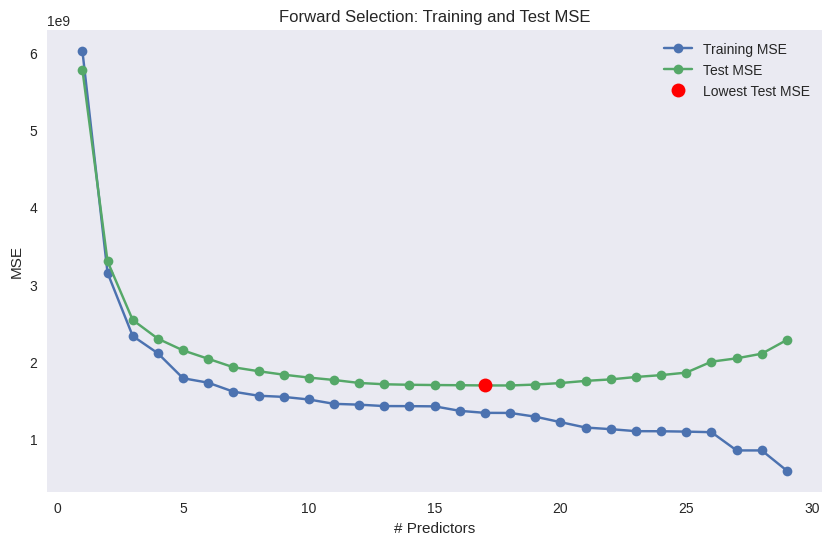

In [1614]:
X = transformed_data[selected_predictors]
Y = transformed_data["SalePrice"]
X_train, X_test, y_train, y_test = split_data(X, Y)

def processSubset(feature_set, X_train, y_train, X_test, y_test):
    model = sm.OLS(y_train, X_train[list(feature_set)])
    regr = model.fit()

    train_predictions = regr.predict(X_train[list(feature_set)])
    train_mse = ((train_predictions - y_train) ** 2).mean()

    test_predictions = regr.predict(X_test[list(feature_set)])
    test_mse = ((test_predictions - y_test) ** 2).mean()

    return {'model': regr, 'train_mse': train_mse, 'test_mse': test_mse}

def forward(predictors, X_train, y_train, X_test, y_test):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors + [p], X_train, y_train, X_test, y_test))

    models = pd.DataFrame(results)

    best_model = models.loc[models['test_mse'].argmin()]

    return best_model

models_train = pd.DataFrame(columns=['train_mse', 'test_mse', 'model'])

predictors = []

# Forward selection loop
for i in range(1, len(X.columns) + 1):
    best_model = forward(predictors, X_train, y_train, X_test, y_test)
    models_train.loc[i] = best_model
    predictors = best_model['model'].model.exog_names

plt.figure(figsize=(10, 6))
plt.plot(models_train['train_mse'], label='Training MSE', marker='o')
plt.plot(models_train['test_mse'], label='Test MSE', marker='o')

min_index = models_train['test_mse'].argmin()
min_test_mse = models_train['test_mse'].min()

plt.plot(min_index, min_test_mse, 'ro', markersize=10, label='Lowest Test MSE')

plt.xlabel('# Predictors')
plt.ylabel('MSE')
plt.title('Forward Selection: Training and Test MSE')
plt.legend()
plt.grid()
plt.show()

The lowest test mse occurs at when there are 17 predictors in the model.

In [1615]:
forward_best_predictors = models_train.loc[min_index, 'model'].model.exog_names
print(f"Predictors at the lowest test MSE: {forward_best_predictors}")

Predictors at the lowest test MSE: ['BldgType_2', 'OverallQual', 'Condition1_3', 'GarageCars', 'Alley_1', 'Neighborhood_0', 'MSSubClass_3', 'BsmtFullBath', 'ScreenPorch', 'encoded_KitchenQual', 'encoded_GarageQual', 'OverallCond', 'encoded_BsmtQual', 'encoded_HouseStyle', 'Condition2_0', 'SaleType_2', 'MSZoning_2']


In [1617]:
X = transformed_data[forward_best_predictors]
Y = transformed_data["SalePrice"]
X_train, X_test, Y_train, Y_test = split_data(X, Y)

run(X_train, X_test, Y_train, Y_test)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          8.78e-253
Time:                        01:45:08   Log-Likelihood:                -9438.1
No. Observations:                 800   AIC:                         1.891e+04
Df Residuals:                     782   BIC:                         1.900e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.546e+05   1

(1034620339.709846, 0.7919893839844392, 1700412998.1033387, 0.6976116718280205)

To further improve the test mse, we can add interaction terms

In [1960]:
X = transformed_data[forward_best_predictors]
Y = transformed_data["SalePrice"]
lowest_test_mse = np.inf
X_best = X.copy()  # Keep a copy of X that contains the best set of features

def test_joint(X, Y):
    X_train, X_test, Y_train, Y_test = split_data(X, Y)
    model = sm.OLS(Y_train, sm.add_constant(X_train))
    model = model.fit()
    Y_test_pred = model.predict(sm.add_constant(X_test))
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    return test_mse

for i in X.columns:
    for j in X.columns:
        joint_feature_name = f'{i}_{j}'
        X_temp = X_best.copy()  # Work on a copy of the best feature set
        X_temp[joint_feature_name] = X[i] * X[j]  # Create the joint feature
        test_mse = test_joint(X_temp, Y)

        # If the test MSE improves, keep the joint feature
        if test_mse < lowest_test_mse:
            X_best[joint_feature_name] = X[i] * X[j]  # Add the joint feature to the best set
            lowest_test_mse = test_mse  # Update the lowest test MSE
            print(f"New lowest test MSE with {joint_feature_name}: {lowest_test_mse}")
        else:
            print(f"No improvement with {joint_feature_name}, skipping.")
            X_temp.drop(columns=[joint_feature_name], inplace=True)  # Remove the joint feature

# Final model evaluation with the best set of joint features
X_train, X_test, Y_train, Y_test = split_data(X_best, Y)

run(X_train, X_test, Y_train, Y_test)

New lowest test MSE with BldgType_2_BldgType_2: 1700412998.103338
No improvement with BldgType_2_OverallQual, skipping.
No improvement with BldgType_2_Condition1_3, skipping.
No improvement with BldgType_2_GarageCars, skipping.
New lowest test MSE with BldgType_2_Alley_1: 1698928116.387635
New lowest test MSE with BldgType_2_Neighborhood_0: 1698852197.5110633
No improvement with BldgType_2_MSSubClass_3, skipping.
New lowest test MSE with BldgType_2_BsmtFullBath: 1698394399.2065399
New lowest test MSE with BldgType_2_ScreenPorch: 1693735666.3069043
No improvement with BldgType_2_encoded_KitchenQual, skipping.
No improvement with BldgType_2_encoded_GarageQual, skipping.
No improvement with BldgType_2_OverallCond, skipping.
No improvement with BldgType_2_encoded_BsmtQual, skipping.
New lowest test MSE with BldgType_2_encoded_HouseStyle: 1693052826.489588
No improvement with BldgType_2_Condition2_0, skipping.
No improvement with BldgType_2_SaleType_2, skipping.
No improvement with BldgType

(750819266.7826964, 0.8490476436567835, 1177975375.463358, 0.7905179478094786)

This will cause high multicollinearity and much more noise in the model as there are many variables that are not statistically-important get added to the model because the lower the test mse, this is also overfitting. Next step would be drop unnecessary variables

In [1969]:
# Set thresholds for p-value and t-value
p_value_threshold = 0.05
t_value_threshold = 1.96

# Add constant to the features
X_best_const = sm.add_constant(X_best)

# Fit the OLS model
model = sm.OLS(Y, X_best_const).fit()

# Get the p-values and t-values from the model summary
p_values = model.pvalues
t_values = model.tvalues

# Iterate through the columns and drop based on p-value and t-value
columns_to_drop = []

for col in X_best_const.columns:
    # Skip the intercept
    if col == 'const':
        continue
    if p_values[col] > p_value_threshold and abs(t_values[col]) < t_value_threshold and col not in forward_best_predictors:
        columns_to_drop.append(col)

# Drop the columns
X_best_filtered = X_best_const.drop(columns=columns_to_drop)
# Refit the model with the remaining variables
model_filtered = sm.OLS(Y, X_best_filtered).fit()

# Check the summary of the new model
print(model_filtered.summary())
X_best_filtered = sm.add_constant(X_best_filtered)
y_pred = model_filtered.predict(X_best_filtered)
mse = mean_squared_error(Y, y_pred)
print(f"Root Test MSE: {sqrt(mse)}")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        03:07:29   Log-Likelihood:                -11713.
No. Observations:                1000   AIC:                         2.349e+04
Df Residuals:                     970   BIC:                         2.363e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

This is the best result we can get through this method, if we use this for the final test data, the rmse would be ()


We can see that from the graph, as the predictors gets more than 17, the test mse woulnd't increase drastically

and the training mse wouldn't drop drastically.

In [2023]:
T = transformed_data[forward_best_predictors]
T['OverallQual_OverallQual'] = T['OverallQual'] * T['OverallQual']
T['OverallQual_Condition1_3'] = T['OverallQual'] * T['Condition1_3']
T['OverallQual_GarageCars'] = T['OverallQual'] * T['GarageCars']
T['OverallQual_OverallCond'] = T['OverallQual'] * T['OverallCond']
T['Condition1_3_OverallQual'] = T['Condition1_3'] * T['OverallQual']
T['GarageCars_Neighborhood_0'] = T['GarageCars'] * T['Neighborhood_0']
T['GarageCars_BsmtFullBath'] = T['GarageCars'] * T['BsmtFullBath']
T['GarageCars_SaleType_2'] = T['GarageCars'] * T['SaleType_2']
T['Alley_1_SaleType_2'] = T['Alley_1'] * T['SaleType_2']
T['Neighborhood_0_MSSubClass_3'] = T['Neighborhood_0'] * T['MSSubClass_3']
T['BsmtFullBath_GarageCars'] = T['BsmtFullBath'] * T['GarageCars']
T['BsmtFullBath_encoded_HouseStyle'] = T['BsmtFullBath'] * T['encoded_HouseStyle']
T['OverallCond_OverallQual'] = T['OverallCond'] * T['OverallQual']
T['OverallCond_OverallCond'] = T['OverallCond'] * T['OverallCond']
T['encoded_BsmtQual_encoded_BsmtQual'] = T['encoded_BsmtQual'] * T['encoded_BsmtQual']
T['encoded_HouseStyle_SaleType_2'] = T['encoded_HouseStyle'] * T['SaleType_2']



<ipython-input-2023-9769073d4610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['OverallQual_OverallQual'] = T['OverallQual'] * T['OverallQual']
<ipython-input-2023-9769073d4610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['OverallQual_Condition1_3'] = T['OverallQual'] * T['Condition1_3']
<ipython-input-2023-9769073d4610>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [1971]:
ols_sm = sm.OLS(Y, X_best_filtered)

# fitted model and summary
model = ols_sm.fit()
model

In [2024]:
# Add a constant term to the prediction data
predictions = model.predict(sm.add_constant(T))
#convert the predictions to a LIST of POSITIVE INTEGERS (do not submit decimals!)
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]
print(rounded_list_predictions)

[172807, 141362, 96211, 196185, 129754, 260221, 66936, 135110, 137770, 170156, 145148, 289810, 230992, 176171, 145860, 394824, 123371, 222302, 212553, 147223, 136477, 214302, 196368, 177114, 107434, 108852, 185265, 184041, 177114, 110901, 110599, 112983, 302078, 159168, 156338, 195457, 88046, 157094, 200433, 185265, 162598, 131416, 185265, 158362, 148917, 106823, 129562, 201285, 214333, 164937, 208514, 116714, 111644, 189982, 166836, 195261, 113891, 224839, 173088, 110122, 138723, 154506, 192641, 129600, 212553, 203601, 212617, 208514, 264933, 105061, 212068, 241464, 87401, 209436, 173067, 201285, 93708, 176585, 95198, 145735, 123371, 214717, 288312, 236332, 127767, 214231, 230196, 156369, 238199, 177114, 197910, 209436, 305511, 125109, 177311, 108010, 97188, 269251, 155496, 88808, 230375, 152085, 304490, 195521, 152428, 145770, 201285, 160238, 230196, 326124, 224874, 201285, 82290, 128444, 119066, 126430, 127167, 209436, 268453, 328717, 232290, 217077, 321862, 156201, 113732, 231016, 

Result is 34587